# Lab1 - 95-791 Data Mining (Fall 2021) 
## Name: Xi Yan
#### Date: Friday, October 22nd, 2021

### Topics covered in this Lab:
- Data Processing
- Linear regression
- Multiple linear regression

### Changing the author field and file name.

 (a) Change the `author:` field on the Jupyter Notebook from Your Name Here to your own name.

 (b) Rename this file to "Lab1_F21_YourHameHere.ipynb", where YourNameHere is changed to your own name.


### Installing and loading packages

Before you begin this Lab make sure you have installed all the required libraries. Load the libraries as indicated below.

You only need to install libraries once.  Once they're installed, you may use them by **importing** the libraries using the `import` command.  For today's lab, you'll want to run the following code


In [25]:
# Packages we will need
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
%matplotlib inline
plt.style.use('seaborn-white')

### 1. Warm-up: Data Processing 

In this notebook we'll be working with a Graduate Admissions Dataset from [Kaggle](https://www.kaggle.com/mohansacharya/graduate-admissions). Please downaload the dataset from Canvas. Here's a description of the variables found in the dataset:

* Serial Number 
* GRE Scores ( out of 340 )
* TOEFL Scores ( out of 120 )
* University Rating ( out of 5 )
* SOP - Statement of Purpose ( out of 5 )
* LOR - Letter of Recommendation Strength ( out of 5 )
* CGPA - Undergraduate GPA ( out of 10 )
* Research - Research Experience ( either 0 or 1 )
* Chance of Admit ( ranging from 0 to 1 )

Acknowledgements
*Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019*

##### 1) a) Begin by reading the file and save it in dataframe called `df_admissions`. Print the first five rows of the dataframe.

In [26]:
# Your code here
df_admissions = pd.read_csv('Admission_Predict_Modif.csv')
df_admissions.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65


**1) b) Are there any missing values in the dataset? If so, how many rows contain missing values and what are the data types for each of columns?**

In [27]:
# Your code here
sum(df_admissions.isnull().values.ravel())

13

In [28]:
# Your code here
df_admissions.dtypes

Serial No.             int64
GRE Score            float64
TOEFL Score          float64
University Rating    float64
SOP                  float64
LOR                  float64
CGPA                 float64
Research             float64
Chance of Admit      float64
dtype: object

--> Your answer here
It contains 13 missing values, the data types for except Serial number, which is Int 64, are Float 64

**1) c) There are a few methodologies to deal with missing values. What makes sense in this case? Deal with the missing values and print your clean dataframe.**

In [29]:
# Your code here
df_admissions = df_admissions.dropna()
print(df_admissions)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1      337.0        118.0                4.0  4.5   4.5  9.65   
1             2      324.0        107.0                4.0  4.0   4.5  8.87   
2             3      316.0        104.0                3.0  3.0   3.5  8.00   
3             4      322.0        110.0                3.0  3.5   2.5  8.67   
4             5      314.0        103.0                2.0  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496      332.0        108.0                5.0  4.5   4.0  9.02   
496         497      337.0        117.0                5.0  5.0   5.0  9.87   
497         498      330.0        120.0                5.0  4.5   5.0  9.56   
498         499      312.0        103.0                4.0  4.0   5.0  8.43   
499         500      327.0        113.0                4.0  4.5   4.5  9.04   

     Research  Chance of Admit   
0         1.0    

**1)d) Which of these variables could be our response variable?  What does this response variable refer to?  How many input variables do we have?**

--> Your answer here
The response variable refer to chance of omit, we have 7  input variables

**1)e) We need two more steps before we do any modeling on our dataset: i) remove any irrelevant columns, ii)make sure the names of the columns do not have any spaces or periods. You can replace the spaces with '' or '_'. Print your cleaned dataset**


In [30]:
# Your code here
df_admissions = df_admissions.iloc[: , 1:]
df_admissions.columns = df_admissions.columns.str.replace(' ','_')
print(df_admissions)

     GRE_Score  TOEFL_Score  University_Rating  SOP  LOR_  CGPA  Research  \
0        337.0        118.0                4.0  4.5   4.5  9.65       1.0   
1        324.0        107.0                4.0  4.0   4.5  8.87       1.0   
2        316.0        104.0                3.0  3.0   3.5  8.00       1.0   
3        322.0        110.0                3.0  3.5   2.5  8.67       1.0   
4        314.0        103.0                2.0  2.0   3.0  8.21       0.0   
..         ...          ...                ...  ...   ...   ...       ...   
495      332.0        108.0                5.0  4.5   4.0  9.02       1.0   
496      337.0        117.0                5.0  5.0   5.0  9.87       1.0   
497      330.0        120.0                5.0  4.5   5.0  9.56       1.0   
498      312.0        103.0                4.0  4.0   5.0  8.43       0.0   
499      327.0        113.0                4.0  4.5   4.5  9.04       0.0   

     Chance_of_Admit_  
0                0.92  
1                0.76  
2  

**1)f)With your cleaned dataset draw a boxplot of `Chance of Admit` per `University Rating`. What initial finding does this plot give you?**


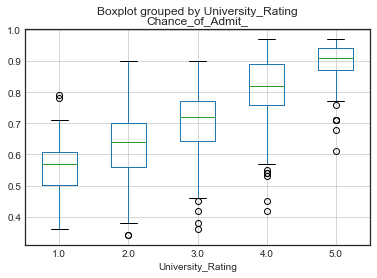

In [9]:
# Your code here
boxplot =df_admissions.boxplot(column='Chance_of_Admit_', by = 'University_Rating')

--> Your answer here
The average admission rate is higher than 50%

**1)g) Do the same as in question 1)f) but this time using `GRE Scores` instead of `Chance of admit`. Explain your findings.**

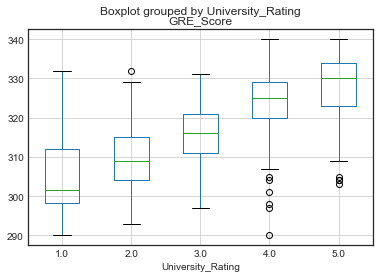

In [10]:
# Your code here
boxplot =df_admissions.boxplot(column='GRE_Score', by = 'University_Rating')

--> Your answer here
The average GRE score distribution is lower than the average Chance of admit

### 2. Simple Linear Regression with the Admissions data.

> For this portion of the Lab you might want to have the textbook ( ISRL - An Introduction to Statistical Learning) open (sections 3.1, 3.2 and 3.2) as you go through the exercises.


**To model a linear regression out of this data we will need additional libraries. The main libraries we will be using are [`statsmodels`](https://www.statsmodels.org/stable/index.html) and [`sckit-learn`](https://scikit-learn.org/stable/).** 

We will also need to visualize our regression models, therefore we will import seaborn and pyplot as well. You probably have some experience creating visualizations with these libraries.


In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

We will first be using `statsmodels` and a [formula notation](https://www.statsmodels.org/dev/example_formulas.html). This is an easier first approach. Look at the example below to see how this works for linear regressions.

> `linear_regression_model = smf.ols('Y ~ X', dataset).fit()`

**2)a) Use the `smf.ols()` function to a fit linear regression of `Chance of Admit` on `GRE Score`.  Save the output of your linear regression in a variable called `lm`.**

In [12]:
# Your code here
lm = smf.ols('Chance_of_Admit_ ~ GRE_Score', df_admissions).fit()

**2)b) Use the `summary()` function on your `lm` variable to get a print-out of your regression results**



In [13]:
# Your code here
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance_of_Admit_   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     952.5
Date:                Fri, 22 Oct 2021   Prob (F-statistic):          1.09e-117
Time:                        16:11:38   Log-Likelihood:                 537.30
No. Observations:                 500   AIC:                            -1071.
Df Residuals:                     498   BIC:                            -1062.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4828      0.104    -23.896      0.000      -2.687      -2.279
GRE_Score      0.0101      0.000     30.862      0.000       0.009       0.011
==============================================================================
Omnibus:                       61.111   Durbin-Watson:                   0.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.883
Skew:                          -0.822   Prob(JB):                     1.84e-20
Kurtosis:                       4.288   Cond. No.                     8.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Understanding a few of the values given by the summary table:**

* R-squared (coefficient of determination) - the strength of the relationship between the model and the dependent variables. This measures the model's quality, meaning the closer this number is to 1.0 the better the model is. Statistically speaking, R-squared is equivalent to the fraction of the variance of *y* that can be explained by the regression model. For example, if R<sup>2</sup> is 0.95, it means that 95% of the variance of *y* can be explained by the model, and the other 5% is unexplained (e.g. sample variability).

* R<sup>2</sup> adjusted - is even better because it accounts for the number of variables in the model, aka it is more realistic.

* F statistic - model is significant or insignificant. It is mostly used for models that use least squares for fitting (or some variance of least squares).

* p-value - if this value is < 0.05 it indicates that the model is statistically significant (falls in a 95% confidence interval). 

**2)c) Uncomment the line below to get a nice printout of the coefficients table**



In [14]:
results_reg = pd.read_html(lm.summary().tables[1].as_html(), header=0, index_col=0)[0]
print(results_reg)


             coef  std err       t  P>|t|  [0.025  0.975]
Intercept -2.4828    0.104 -23.896    0.0  -2.687  -2.279
GRE_Score  0.0101    0.000  30.862    0.0   0.009   0.011


**2)d)  Call `params` on `lm` to explore what values this linear model contains. What is the estimated Intercept?  What is the coefficient of `GREScore` in the model?  Interpret this coefficient.**

In [15]:
# Your code here
lm.params

Intercept   -2.482815
GRE_Score    0.010126
dtype: float64

--> Your answer here
When GRE score is 0, the Chance of admission is -2.48

Seaborn can plot the predictions produced by our fitted model (previous questions) or can use [regplot()](https://seaborn.pydata.org/generated/seaborn.regplot.html) to fit a linear regression on the data provided.

**2)e) Use seaborn to overlay a linear regression line (with regplot()) on a scatterplot of `ChanceofAdmit` vs. `GREScore`.  Edit the `xlab` and `ylab` arguments to produce more meaningful axis labels.  Does the linear model appear to fit the data well?  Explain.**



[Text(0.5, 0, 'GRE score'), Text(0, 0.5, 'Chance of admit')]

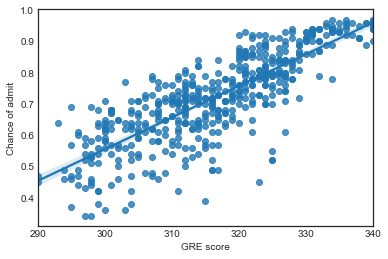

In [16]:
# Your code here
ax = sns.regplot(x='GRE_Score', y='Chance_of_Admit_', data=df_admissions);
ax.set(xlabel='GRE score', ylabel='Chance of admit')

--> Your answer here
Not really, since the scatter points are spreaded pretty far between each other

---

### 3. Multiple Linear Regression with the Admission Data



**3)a) Following the example in part 2)e) of this lab, construct a scatterplot of `ChanceofAdmit` versus `TOEFLScores`.  Make sure to specify meaningful x and y axis names.  Overlay a linear regression line.  Does a linear relationship appear to hold between the two variables?**

[Text(0.5, 0, 'TOEFL score'), Text(0, 0.5, 'Chance of admit')]

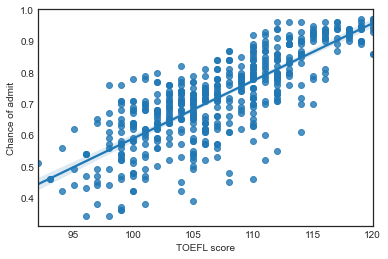

In [17]:
# Your code here
ax2 = sns.regplot(data=df_admissions, x='TOEFL_Score', y='Chance_of_Admit_')
ax2.set(xlabel='TOEFL score', ylabel='Chance of admit')

--> Your answer here
There is no obvious linearity relationship between these two variables

**3)b) Use the `smf.ols()` command to a fit a linear regression of `ChanceofAdmit` on `GREScores` and `TOEFLScores`.  Save your regression model in a variable called `lm_gt`.**

*Note: You can add variables with a + sign.*

In [22]:
# Your code here
lm_gt = smf.ols('Chance_of_Admit_ ~ GRE_Score + TOEFL_Score', df_admissions).fit()

**3)c)Did your model in 3)b) improve compared to 2)b)?**

--> Your answer here
Yes, the R^2 is larger

**(d)  What is the coefficient of `GREScore` in your model?  Interpret this coefficient.**



In [19]:
# Your code here
lm_gt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance_of_Admit_   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     590.3
Date:                Fri, 22 Oct 2021   Prob (F-statistic):          5.16e-132
Time:                        16:11:42   Log-Likelihood:                 574.16
No. Observations:                 500   AIC:                            -1142.
Df Residuals:                     497   BIC:                            -1130.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.1803      0.102    -21.284      0.000      -2.382      -1.979
GRE_Score       0.0061      0.001     11.300      0.000       0.005       0.007
TOEFL_Score     0.0090      0.001      8.886      0.000       0.007       0.011
==============================================================================
Omnibus:                       74.774   Durbin-Watson:                   0.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.617
Skew:                          -0.926   Prob(JB):                     2.37e-27
Kurtosis:                       4.568   Cond. No.                     9.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

--> Your answer here
For a unit increase in GRE score, the chance of admit increases 0.0061, (0.61%).

**(e) Use `ChanceofAdmit ~ GREScore + TOEFLScore + SOP + Research...` syntax to fit a model regressing `ChanceofAdmit` on all the other variables. You can list all the other columns manually, but that would take time and generate errors. Instead try to join all the other columns names (except medv) into a single string separating them by `+`. After your linear model is calculated print out its `summary()`.**


In [33]:
# Your code here
lm = smf.ols('Chance_of_Admit_ ~ GRE_Score+TOEFL_Score+University_Rating+SOP+LOR_+CGPA+Research', df_admissions).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance_of_Admit_   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Fri, 22 Oct 2021   Prob (F-statistic):          8.21e-180
Time:                        16:14:48   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.2757      0.104    -12.232      0.000      -1.481      -1.071
GRE_Score             0.0019      0.001      3.700      0.000       0.001       0.003
TOEFL_Score           0.0028      0.001      3.184      0.002       0.001       0.004
University_Rating     0.0059      0.004      1.563      0.119      -0.002       0.013
SOP                   0.0016      0.005      0.348      0.728      -0.007       0.011
LOR_                  0.0169      0.004      4.074      0.000       0.009       0.025
CGPA                  0.1184      0.010     12.198      0.000       0.099       0.137
Research              0.0243      0.007      3.680      0.000       0.011       0.037
==============================================================================
Omnibus:                      112.770   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.104
Skew:                          -1.160   Prob(JB):                     1.22e-57
Kurtosis:                       5.684   Cond. No.                     1.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**(f) Think about what the variables in the data set mean.  Do the signs of all of the coefficient estimates make sense?  Are there any that do not?  For the ones that do not, are the coefficients statistically significant (do they have p-value < 0.05)?**



In [21]:
# Your code here

--> Your answer here
All of them make sense, since they are subjected to have a positive correlation. The variables that are not statistically significant is University Rating and SOP.

**(g) Compute a correlation matrix for the variables that had positive coefficients in the multilinear regression model previously calculated. You can use [pairplots](https://seaborn.pydata.org/generated/seaborn.pairplot.html) or [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) in Seaborn to plot a correlation matrix. Briefly explain why these plots are useful.**

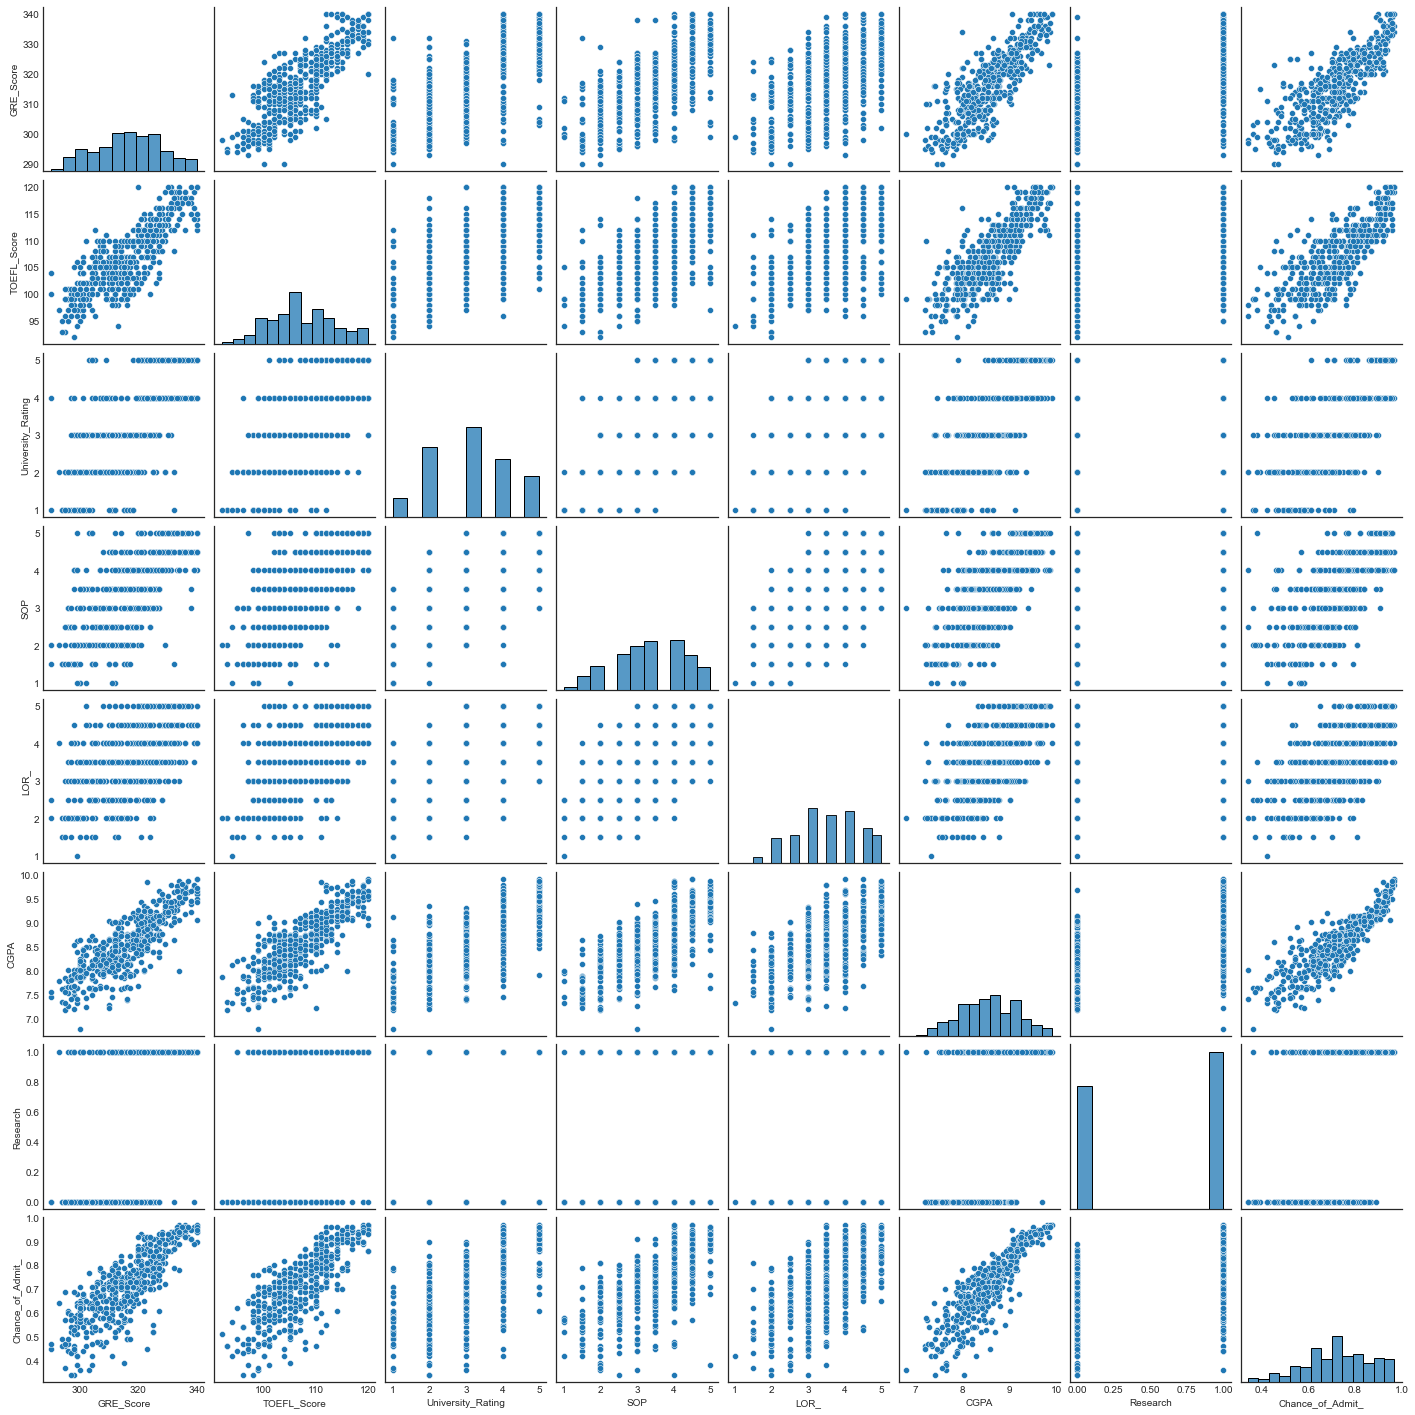

In [37]:
# Your code here
sns.pairplot(df_admissions)

<AxesSubplot:>

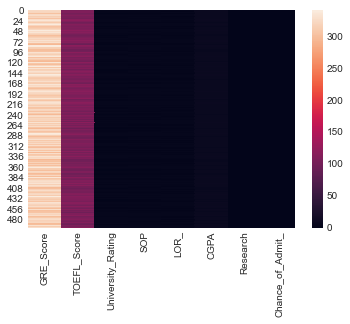

In [38]:
# Your code here
sns.heatmap(df_admissions)

--> Your answer here

---

## END OF LAB !